In [5]:
import csv
import cv2
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

lines = []
idx = 0
log_file = "./driving_log.csv"
# log_file = "./driving_log1.csv"
zero_steering_count = 0
column_names = ['center', 'left', 'right',
                'steering', 'throttle', 'brake', 'speed']

In [6]:
data_df = pd.read_csv(log_file,names=column_names)


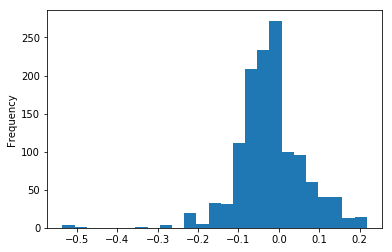

In [12]:
%matplotlib inline
data_df['steering'].plot.hist(bins=25)

In [8]:
data_df['steering'].describe()


count    1286.000000
mean       -0.020849
std         0.083535
min        -0.535294
25%        -0.064706
50%        -0.023529
75%         0.017647
max         0.217647
Name: steering, dtype: float64

In [15]:
data_df.query('steering != 0')['steering'].plot.hist(bins=25)

In [16]:

def filter_driving_straight(data_df, hist_items=6):
    steering_history = deque([])
    
    drop_rows=[]
    
    for idx, row in data_df.iterrows():
        # controls = [getattr(row, control) for control in vehicle_controls]
        steering = getattr(row, 'steering')

        # record the recent steering history
        steering_history.append(steering)
        if len(steering_history) > hist_items:
            steering_history.popleft()

        # if just driving in a straight line continue
        if steering_history.count(0.0) == hist_items:
            drop_rows.append(idx)

    return data_df.drop(data_df.index[drop_rows])

NameError: name 'legend' is not defined

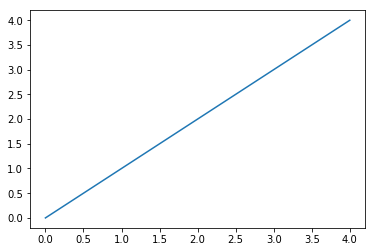

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

#legend = "\xe2".decode(encoding='latin-1')

plt.plot(range(5), range(5))
plt.legend([legend])